# (Rings 값 예측)

Epoch 1/20


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 57.4591 - val_loss: 89.4601
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.2811 - val_loss: 71.5987
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8192 - val_loss: 46.0584
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5520 - val_loss: 26.1639
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3002 - val_loss: 14.8038
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0021 - val_loss: 10.3855
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3828 - val_loss: 7.3403
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8009 - val_loss: 6.6120
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4541 - val_loss: 6.3063
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7084 - val_loss: 5.7686
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6737 - val_loss: 6.2183
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4888 - val_l

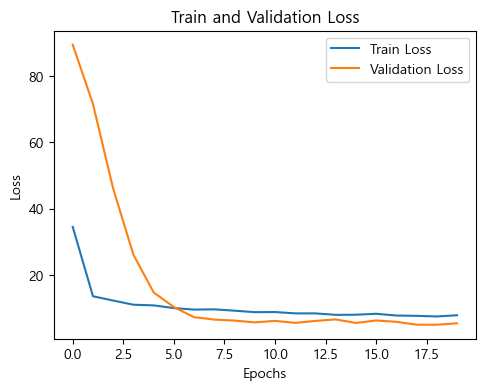

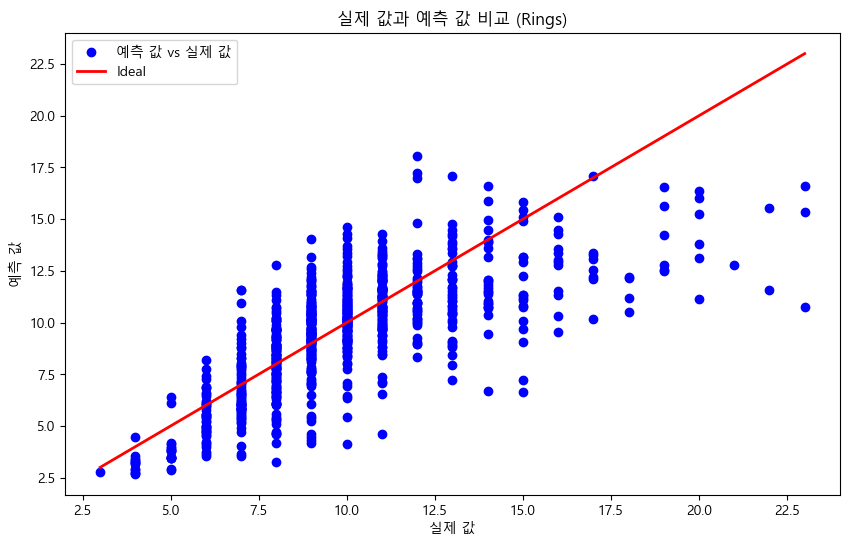

In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score  # 누락된 부분 임포트

# 데이터 로드 (GitHub에서 다운로드)
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/abalone.csv'
data = pd.read_csv(url)

# 'Sex' 열을 One-hot 인코딩
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# 2. 데이터 전처리 (회귀 문제)
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CNN 모델에서 1D 입력을 필요로 하므로 차원을 추가
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 3. CNN 회귀 모델 구성 (1D Convolution 사용)
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # 회귀 문제이므로 출력 노드는 1개 (활성화 함수 없음)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 4. 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"CNN 회귀 모델 성능 평가:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 5. 학습 곡선 시각화 (기존과 동일)
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 6. 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='예측 값 vs 실제 값')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.title('실제 값과 예측 값 비교 (Rings)')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.show()
